In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
cs_set = [16, 32, 64, 84, 108, 128]
num_set = [40000, 80000, 120000, 160000, 200000, 230000]
filename_template = 'perf_locs_{}_cs_{}'
file_folder = './log/v100'

perf_glops = np.zeros([len(num_set), len(cs_set)])
perf_time = np.zeros([len(num_set), len(cs_set)])

for i, locs_num in enumerate(num_set):
    for j, cs in enumerate(cs_set):
        filename = filename_template.format(locs_num, cs)
        file_path = os.path.join(file_folder, filename)
        # Open the file
        with open(file_path, 'r') as file:
            # Read all lines into a list
            lines = file.readlines()

            # Access the third and sixth lines
            time_total = lines[2].strip().split(" ")[0]
            gflop_ops = lines[5].strip().split(" ")[0]
            
            perf_glops[i, j] = gflop_ops
            perf_time[i, j] = time_total

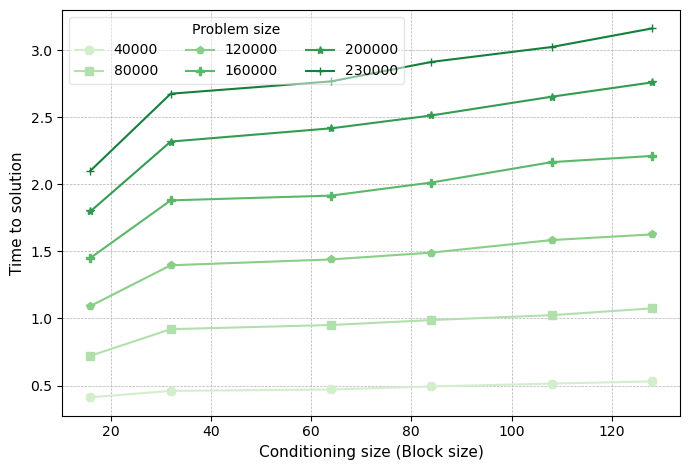

In [37]:
# Create a plot with a larger size and a better style
plt.figure(figsize=(7, 4.8))

colors = cm.Greens(np.linspace(0.2, 0.8, len(num_set)))
markers = ["8", "s", "p", "P", "*", "+", "D", "v", "^"]
# Plot both arrays with different colors and line styles
for i, num_loc in enumerate(num_set):
    plt.plot(cs_set, perf_time[i, :], color=colors[i], linewidth=1.5, marker=markers[i], label=str(num_loc))

# Adding enhanced legend, title, and labels
legend = plt.legend(ncol = len(num_set)//2, title = 'Problem size') #loc='upper left', bbox_to_anchor=(1, 1)
legend.get_frame().set_alpha(0.5)  # 50% transparency
plt.xlabel('Conditioning size (Block size)', fontsize=11)
plt.ylabel('Time to solution', fontsize=11)
# plt.ylim(0.2, 4.0)

# Adding grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.yscale('log')
# plt.ylim(1.5, 3.9)

plt.tight_layout()
plt.savefig(f'./fig/perf_time_v100.pdf')
plt.show()

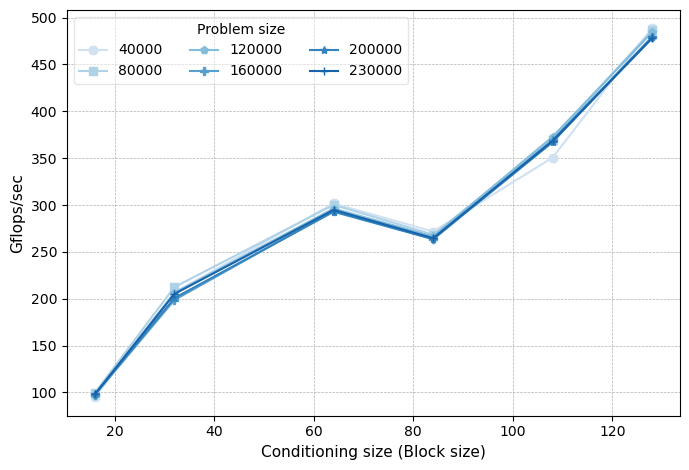

In [38]:
# Create a plot with a larger size and a better style
plt.figure(figsize=(7, 4.8))

colors = cm.Blues(np.linspace(0.2, 0.8, len(num_set)))
markers = ["8", "s", "p", "P", "*", "+", "D", "v", "^"]
# Plot both arrays with different colors and line styles
for i, num_loc in enumerate(num_set):
    plt.plot(cs_set, perf_glops[i, :], color=colors[i], linewidth=1.5, marker=markers[i], label=str(num_loc))

# Adding enhanced legend, title, and labels
legend = plt.legend(ncol = len(num_set)//2, title = 'Problem size') #loc='upper left', bbox_to_anchor=(1, 1)
legend.get_frame().set_alpha(0.5)  # 50% transparency
plt.xlabel('Conditioning size (Block size)', fontsize=11)
plt.ylabel('Gflops/sec', fontsize=11)

# Adding grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.yscale('log')
# plt.ylim(1.5, 3.9)

plt.tight_layout()
plt.savefig(f'./fig/perf_gflops_v100.pdf')
plt.show()